In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from keras import models
import cv2
from PIL import Image

import sys,os
from importlib import reload
sys.path.append('..')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks'

# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks


'/content/gdrive/My Drive/Colab Notebooks'

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test :  (10000, 28, 28, 1)
y_test :  (10000,)


In [ ]:
print(f"Avant la normalisation : Min={x_train.min()}, Max={x_train.max()}")

xmax = x_train.max()
x_train = x_train/xmax
x_test = x_test/xmax

print(f"Après la normalisation : Min={x_train.min()}, Max={x_train.max()}")

Avant la normalisation : Min=0, Max=255
Après la normalisation : Min=0.0, Max=1.0


In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Input((28, 28, 1)))

model.add(keras.layers.Conv2D(2, (3, 3), activation="sigmoid"))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(8, (3, 3), activation="sigmoid"))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(32, (3, 3), activation="sigmoid"))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="sigmoid"))

model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics="accuracy")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 2)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 8)         152       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 32)          2336      
                                                                 
 flatten_1 (Flatten)         (None, 288)              

In [ ]:
batch_size = 32
epochs = 20

history = model.fit(  x_train, y_train,
                      batch_size = batch_size,
                      epochs = epochs,
                      verbose = True,
                      validation_data = (x_test, y_test)
                    )

Epoch 1/20
1875/1875 [==============================] - 27s 13ms/step - loss: 1.3243 - accuracy: 0.5414 - val_loss: 0.4057 - val_accuracy: 0.8789
Epoch 2/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3224 - accuracy: 0.9012 - val_loss: 0.2347 - val_accuracy: 0.9253
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2094 - accuracy: 0.9356 - val_loss: 0.1657 - val_accuracy: 0.9496
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1520 - accuracy: 0.9530 - val_loss: 0.1256 - val_accuracy: 0.9613
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1203 - accuracy: 0.9634 - val_loss: 0.1096 - val_accuracy: 0.9653
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1016 - accuracy: 0.9689 - val_loss: 0.0897 - val_accuracy: 0.9709
Epoch 7/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0881 - accuracy: 0.9725 - val_loss: 0.0857 -

Test loss   : 0.0490
Test accuracy   : 0.9844


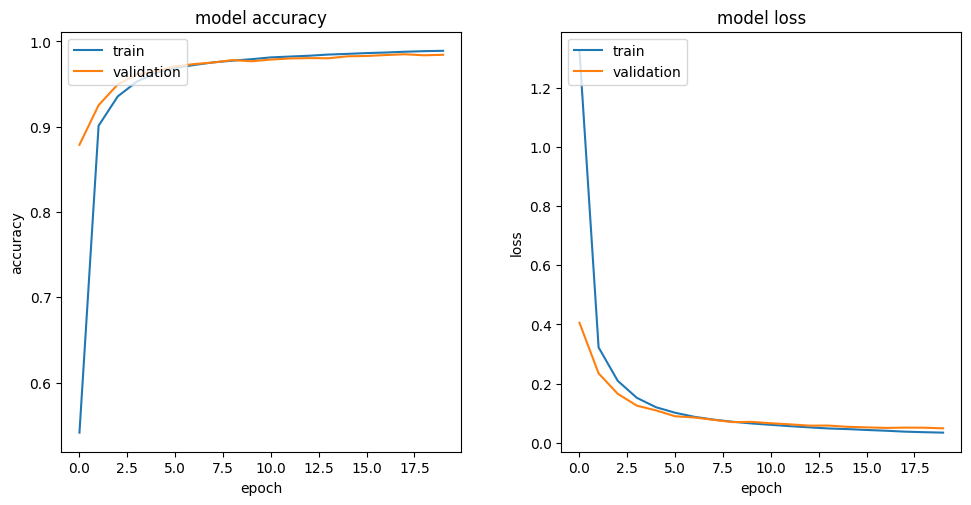

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss   : {score[0]:4.4f}')
print(f'Test accuracy   : {score[1]:4.4f}')

plt.figure(1,figsize=(16,6))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)
model.metrics_names
plt.subplot(1,3,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,3,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

313/313 [==============================] - 2s 7ms/step


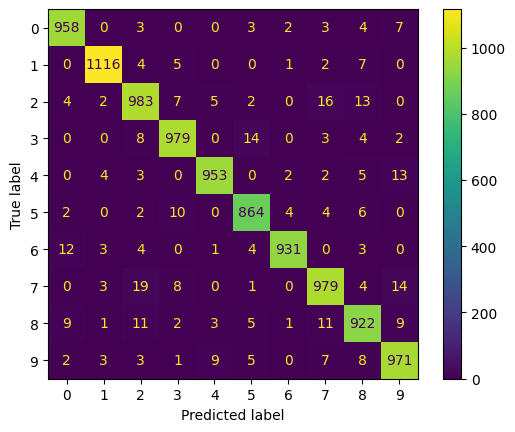

In [ ]:
class Estimator:
    _estimator_type = ''
    classes = []
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = "classifier"
        self.classes = classes
    def predict(self, X):
        y_prob = self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred


class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
classifier = Estimator(model, class_names)
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [ ]:
model.save("Model_Result/TP.h5", save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = models.load_model("Model_Result/TP.h5")

In [ ]:
# This function takes an image path as input, loads and processes the image, and predicts the class.
def predict_image(image_path, model):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert image to grayscale ('L' mode)

    # Resize to the appropriate input size (28, 28)
    img = img.resize((28, 28), Image.ANTIALIAS)

    # Convert the image to a NumPy array and invert it for white digits on a black background
    img_array = 255 - np.array(img)

    # Normalize the pixel values
    img_array = img_array / 255.0

    # Reshape the array for model input and expand dims to represent a batch of size 1
    img_input = img_array.reshape((1, 28, 28, 1))

    # Make a prediction
    prediction = model.predict(img_input).argmax(axis=1)

    return prediction[0]  # Return the predicted class label

predicted_class = predict_image('Test.png', model)
print(f'Label prédit: {predicted_class}')

<ipython-input-40-2a091b3999a4>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((28, 28), Image.ANTIALIAS)


1/1 [==============================] - 0s 161ms/step
Label prédit: 2


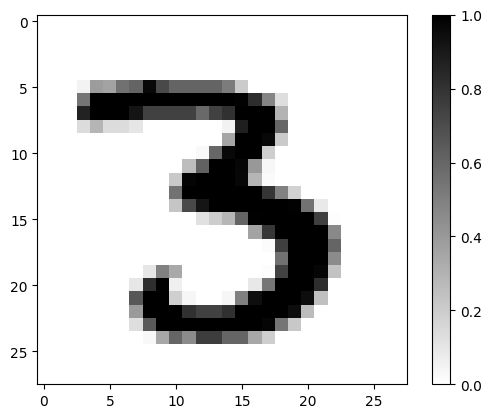

In [ ]:
plt.figure()
plt.imshow(x_train[12], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
#plt.xlabel(class_names[train_labels[numimage]])
plt.show()